In [5]:
import numpy as np

In [6]:
# lets implement sigmoid function

def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [9]:
sigmoid(10), sigmoid(456), sigmoid(23)

(0.9999546021312976, 1.0, 0.9999999998973812)

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

In [49]:
# Step 1: Define static data (features and labels)
# Features [Height (in cm), Weight (in Kg)]
# Labels: 0 = Not Athlete, 1 = Athelete
X = [
    [170, 70],
    [160, 60],
    [180, 80],
    [150, 50],
    [165, 65],
    [190, 90],
    [155, 55]
]

y = [1, 0, 1, 0, 0, 1, 0]

In [50]:
# Step 2: Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
# Step 3: Initialize and train the Logistic Regression model

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [52]:
# Step 4: Make predictions

predections = model.predict(X_test)
probabilities = model.predict_proba(X_test)

In [53]:
X_test

[[170, 70], [160, 60], [190, 90]]

In [54]:
predections

array([0, 0, 1])

In [55]:
probabilities

array([[7.92612525e-01, 2.07387475e-01],
       [9.98762487e-01, 1.23751264e-03],
       [8.56984267e-05, 9.99914302e-01]])

In [56]:
# Step 5: Evaluate the model

accuracy = accuracy_score(y_test, predections)

# Loss = - (y * log(p) + (1 - y) * log(1 - p))
cost = log_loss(y_test, predections)
conf_matrix = confusion_matrix(y_test, predections)

In [57]:
accuracy, cost

(0.6666666666666666, 12.014551129705717)

In [58]:
conf_matrix

array([[1, 0],
       [1, 1]])

In [59]:
# Step 6: Visualize the S-curve

def logistic_curve(x, coef, intercept):
    return 1 / (1 + np.exp(-(coef * x + intercept)))

In [63]:
height_range = np.linspace(140, 200, 500)
weight_range = np.linspace(40, 100, 500)
h, w = np.meshgrid(height_range, weight_range)
flat_h = h.ravel()
flat_w = w.ravel()
data_grid = np.column_stack((flat_h, flat_w))
probs = model.predict_proba(data_grid)[:, 1].reshape(h.shape)

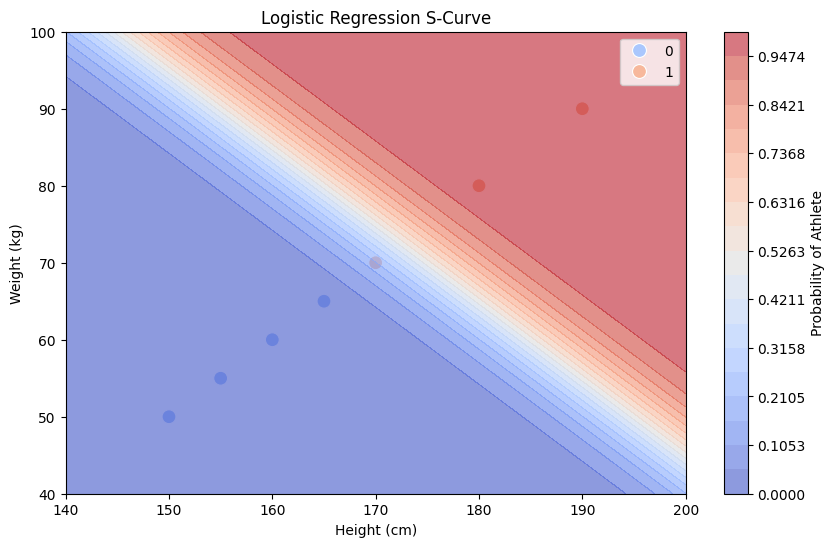

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=[x[0] for x in X], y=[x[1] for x in X], hue=y, palette="coolwarm", s=100)
plt.contourf(h, w, probs, levels=np.linspace(0, 1, 20), cmap="coolwarm", alpha=0.6)
plt.colorbar(label="Probability of Athlete")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Logistic Regression S-Curve")
plt.show()

In [65]:
print('Test Data')
print(X_test)

print('True Labels')
print(y_test)

print('Predicted Labels')
print(predections)

print('Accuracy')
print(accuracy)

print('Cost')
print(cost)

print('Confusion Matrix')
print(conf_matrix)

Test Data
[[170, 70], [160, 60], [190, 90]]
True Labels
[1, 0, 1]
Predicted Labels
[0 0 1]
Accuracy
0.6666666666666666
Cost
12.014551129705717
Confusion Matrix
[[1 0]
 [1 1]]


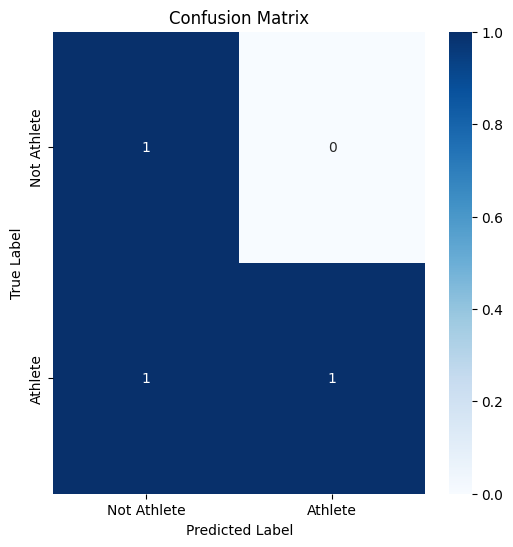

In [67]:
# Visualize the confusion matrix

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Athlete", "Athlete"], yticklabels=["Not Athlete", "Athlete"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [69]:
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

In [70]:
# The proportion of positive predictions that are actually correct.
precesion = TP / (TP + FP)
# A higher precision indicates that the model is making fewer false positive predictions.

# The proportion of actual positive cases that the model correctly identifies.
recall = TP / (TP + FN)
# A higher recall indicates that the model is identifying more true positive cases.

# The harmonic mean of precision and recall.
f1_score = 2 * (precesion * recall) / (precesion + recall)
# A higher F1-score indicates a better-performing model.

# The proportion of correct predictions made by the model.
accuracy = (TP + TN) / (TP + TN + FP + FN)
# A higher accuracy indicates that the model is making more correct predictions.
# However, it can be misleading in imbalanced datasets.

In [73]:
print('Precesion: ', precesion)
print('Recall: ', recall)
print('F1 Score: ', f1_score)
print('Accuracy: ', accuracy)

Precesion:  1.0
Recall:  0.5
F1 Score:  0.6666666666666666
Accuracy:  0.6666666666666666
